In [3]:
import pandas as pd 
import numpy as np 
import os 

In [4]:
anime = pd.read_csv("../dataset/anime.csv") 
ratings = pd.read_csv("../dataset/rating.csv") 

In [5]:
anime

anime_id                                               name  \
0         32281                                     Kimi no Na wa.   
1          5114                   Fullmetal Alchemist: Brotherhood   
2         28977                                           Gintama°   
3          9253                                        Steins;Gate   
4          9969                                      Gintama&#039;   
...         ...                                                ...   
12289      9316       Toushindai My Lover: Minami tai Mecha-Minami   
12290      5543                                        Under World   
12291      5621                     Violence Gekiga David no Hoshi   
12292      6133  Violence Gekiga Shin David no Hoshi: Inma Dens...   
12293     26081                   Yasuji no Pornorama: Yacchimae!!   

                                                   genre   type episodes  \
0                   Drama, Romance, School, Supernatural  Movie        1   
1      Action, Adventure, Drama, Fantasy, Magic, Mili...     TV       64   
2      Action, Comedy, Historical, Parody, Samurai, S...     TV       51   
3                                       Sci-Fi, Thriller     TV       24   
4      Action, Comedy, Historical, Parody, Samurai, S...     TV       51   
...                                                  ...    ...      ...   
12289                                             Hentai    OVA        1   
12290                                             Hentai    OVA        1   
12291                                             Hentai    OVA        4   
12292                                             Hentai    OVA        1   
12293                                             Hentai  Movie        1   

       rating  members  
0        9.37   200630  
1        9.26   793665  
2        9.25   114262  
3        9.17   673572  
4        9.16   151266  
...       ...      ...  
12289    4.15      211  
12290    4.28      183  
12291    4.88      219  
12292    4.98      175  
12293    5.46      142  

[12294 rows x 7 columns]

In [6]:
ratings

user_id  anime_id  rating
0              1        20      -1
1              1        24      -1
2              1        79      -1
3              1       226      -1
4              1       241      -1
...          ...       ...     ...
7813732    73515     16512       7
7813733    73515     17187       9
7813734    73515     22145      10
7813735    73516       790       9
7813736    73516      8074       9

[7813737 rows x 3 columns]

In [7]:
strange_ratings = ratings.loc[ratings.rating < 0, :]

In [8]:
anime[anime.name.str.contains("Gintama")] 

anime_id                                               name  \
2         28977                                           Gintama°   
4          9969                                      Gintama&#039;   
8         15335  Gintama Movie: Kanketsu-hen - Yorozuya yo Eien...   
9         15417                           Gintama&#039;: Enchousen   
12          918                                            Gintama   
41        32366                         Gintama°: Aizome Kaori-hen   
63        21899        Gintama: Yorinuki Gintama-san on Theater 2D   
65         7472             Gintama Movie: Shinyaku Benizakura-hen   
171        6945                         Gintama: Shiroyasha Koutan   
216        9735                   Gintama: Shinyaku Benizakura-hen   
306       25313                   Gintama: Jump Festa 2014 Special   
316       10643                             Gintama: Dai Hanseikai   
361       32122                   Gintama: Jump Festa 2015 Special   
380        2951  Gintama: Nanigoto mo Saiyo ga Kanjin nano de T...   
3246      19261                                Gintama x Mameshiba   
10896     34096                                     Gintama (2017)   

                                                   genre     type episodes  \
2      Action, Comedy, Historical, Parody, Samurai, S...       TV       51   
4      Action, Comedy, Historical, Parody, Samurai, S...       TV       51   
8      Action, Comedy, Historical, Parody, Samurai, S...    Movie        1   
9      Action, Comedy, Historical, Parody, Samurai, S...       TV       13   
12     Action, Comedy, Historical, Parody, Samurai, S...       TV      201   
41                                        Comedy, Parody      OVA        2   
63     Action, Comedy, Historical, Parody, Samurai, S...    Movie        2   
65     Action, Comedy, Historical, Parody, Samurai, S...    Movie        1   
171           Action, Comedy, Historical, Parody, Sci-Fi  Special        1   
216    Action, Comedy, Historical, Parody, Samurai, S...  Special        1   
306    Action, Comedy, Historical, Parody, Samurai, S...  Special        1   
316                      Action, Comedy, Parody, Samurai  Special        1   
361    Action, Comedy, Historical, Parody, Samurai, S...  Special        1   
380    Action, Comedy, Historical, Mecha, Parody, Sam...  Special        1   
3246                                      Comedy, Parody  Special        6   
10896  Action, Comedy, Historical, Parody, Samurai, S...       TV  Unknown   

       rating  members  
2        9.25   114262  
4        9.16   151266  
8        9.10    72534  
9        9.11    81109  
12       9.04   336376  
41       8.69    16947  
63       8.60    11104  
65       8.59    51185  
171      8.37    27213  
216      8.31    14002  
306      8.20    13764  
316      8.19    14728  
361      8.15     7923  
380      8.13    29331  
3246     7.04     5566  
10896     NaN    13383

In [9]:
# getting the list of all genre's that exist inside the python file 
genres = set() 
genre_lists = anime.genre.unique() 
for genre_list in genre_lists: 
    if isinstance(genre_list, str): 
        genre_items = genre_list.split(",")
        for genre in genre_items: 
            genres.add(genre.strip())
genres = list(genres) 


In [10]:
from typing import List, Dict 

def generate_encodings(genre_string: str, genres: List[str]) -> np.array: 
    vector: np.array = np.zeros((1, len(genres)))  
    
    if isinstance(genre_string, str): 
        genre_map: Dict[str, int] = { gn: idx for idx, gn in enumerate(genres) } 
        genre_list: List[str] = genre_string.split(",") 
        for genre in genre_list:
                vector[0, genre_map[genre.strip()]] = 1  
                
    return vector 

vectors = anime.genre.apply(lambda x: generate_encodings(x, genres))  

In [11]:
genre_encodings = np.vstack(vectors.values.tolist()).astype(np.int32) 

In [12]:
type_disintegration = pd.get_dummies(anime["type"], drop_first=True) 

In [13]:
genre_map: Dict[str, int] = { gn: idx for idx, gn in enumerate(genres) } 

In [14]:
anime_map: Dict[int, str] = {} 
for _, anime_row in anime.iterrows(): 
    anime_id = anime_row["anime_id"] 
    anime_name = anime_row["name"] 
    anime_map[anime_id] = anime_name 


In [15]:
items = genre_map.items() 
sorted(items, key = lambda x: x[1])  
genre_names = [name for name, _ in items] 
encoding_df = pd.DataFrame(genre_encodings,columns=genre_names ) 

In [16]:
processed_anime = pd.concat([
    anime[["anime_id", "episodes", "rating", "members"]], 
    type_disintegration, encoding_df], axis=1) 

In [17]:
processed_anime = processed_anime.set_index("anime_id") 

In [18]:
processed_anime

episodes  rating  members  Music    ONA    OVA  Special     TV  \
anime_id                                                                  
32281           1    9.37   200630  False  False  False    False  False   
5114           64    9.26   793665  False  False  False    False   True   
28977          51    9.25   114262  False  False  False    False   True   
9253           24    9.17   673572  False  False  False    False   True   
9969           51    9.16   151266  False  False  False    False   True   
...           ...     ...      ...    ...    ...    ...      ...    ...   
9316            1    4.15      211  False  False   True    False  False   
5543            1    4.28      183  False  False   True    False  False   
5621            4    4.88      219  False  False   True    False  False   
6133            1    4.98      175  False  False   True    False  False   
26081           1    5.46      142  False  False  False    False  False   

          Demons  Sports  ...  Thriller  Josei  Historical  Fantasy  Samurai  \
anime_id                  ...                                                  
32281          0       0  ...         0      0           0        0        0   
5114           0       0  ...         0      0           0        1        0   
28977          0       0  ...         0      0           1        0        1   
9253           0       0  ...         1      0           0        0        0   
9969           0       0  ...         0      0           1        0        1   
...          ...     ...  ...       ...    ...         ...      ...      ...   
9316           0       0  ...         0      0           0        0        0   
5543           0       0  ...         0      0           0        0        0   
5621           0       0  ...         0      0           0        0        0   
6133           0       0  ...         0      0           0        0        0   
26081          0       0  ...         0      0           0        0        0   

          Magic  Cars  Supernatural  Harem  Adventure  
anime_id                                               
32281         0     0             1      0          0  
5114          1     0             0      0          1  
28977         0     0             0      0          0  
9253          0     0             0      0          0  
9969          0     0             0      0          0  
...         ...   ...           ...    ...        ...  
9316          0     0             0      0          0  
5543          0     0             0      0          0  
5621          0     0             0      0          0  
6133          0     0             0      0          0  
26081         0     0             0      0          0  

[12294 rows x 51 columns]

In [19]:
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer 

In [20]:
def remove_unknown(episodes: int| str) -> int: 
    if isinstance(episodes, str) and episodes.strip() == "Unknown":  
        return 0
    else: 
        return int(episodes)  

In [21]:
processed_anime["episodes"] = processed_anime.episodes.apply(remove_unknown) 
processed_anime.dropna(inplace=True) 

In [22]:
ctrf = ColumnTransformer([
    ('scaler', MinMaxScaler(), [0, 1, 2]), 
    ('binary_encode', OneHotEncoder(drop="first"), [3, 4, 5, 6, 7]), 
], remainder='passthrough') 

X = ctrf.fit_transform(processed_anime) 

In [23]:
from sklearn.cluster import DBSCAN 
db = DBSCAN(eps=0.3, min_samples=30)
db.fit(X)
labels = db.labels_

In [24]:
list(labels).count(-1) 

9417

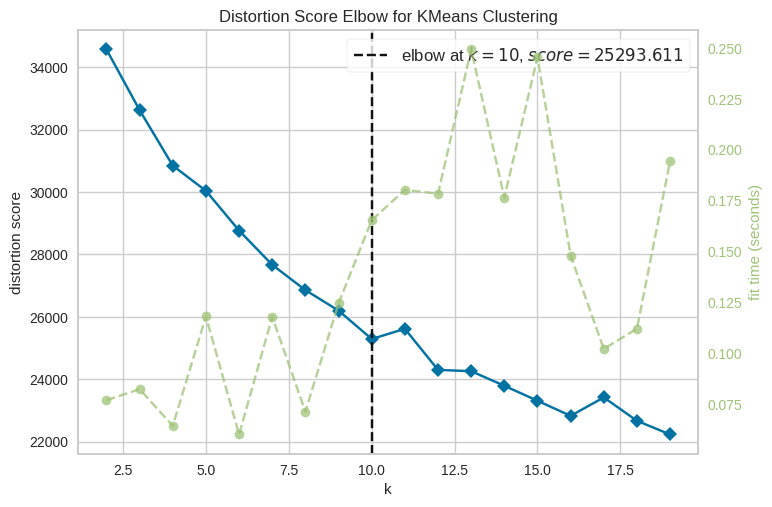

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [25]:
from yellowbrick.cluster import KElbowVisualizer 
from sklearn.cluster import KMeans 

model = KMeans() 
viz = KElbowVisualizer(model, k = (2, 20)) 
viz.fit(X) 
viz.show() 

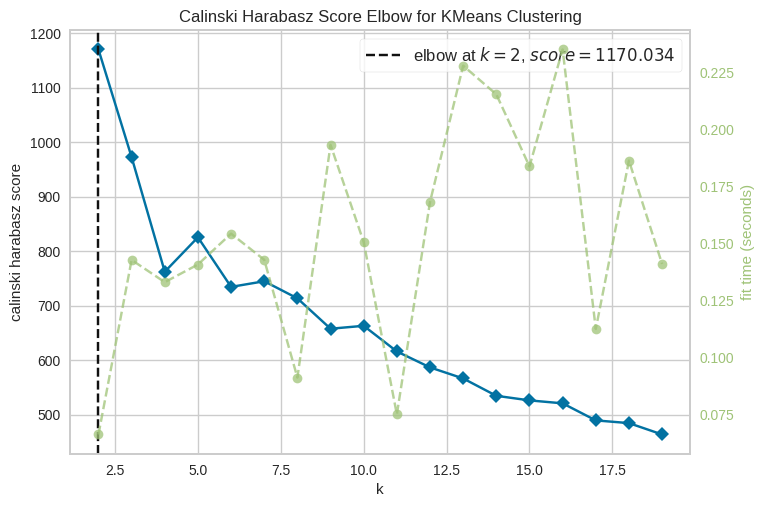

<Axes: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [26]:
model = KMeans() 
viz = KElbowVisualizer(model, metric="calinski_harabasz", k = (2, 20)) 
viz.fit(X) 
viz.show() 

In [27]:
model = KMeans(n_clusters=9) 
model.fit(X) 
label_k_nine = model.labels_

In [28]:
pd.Series(label_k_nine).value_counts() 

6    2226
5    2054
2    1840
1    1327
4    1263
7    1174
3    1037
8     919
0     224
Name: count, dtype: int64

In [29]:
processed_anime 

episodes  rating  members  Music    ONA    OVA  Special     TV  \
anime_id                                                                   
32281            1    9.37   200630  False  False  False    False  False   
5114            64    9.26   793665  False  False  False    False   True   
28977           51    9.25   114262  False  False  False    False   True   
9253            24    9.17   673572  False  False  False    False   True   
9969            51    9.16   151266  False  False  False    False   True   
...            ...     ...      ...    ...    ...    ...      ...    ...   
9316             1    4.15      211  False  False   True    False  False   
5543             1    4.28      183  False  False   True    False  False   
5621             4    4.88      219  False  False   True    False  False   
6133             1    4.98      175  False  False   True    False  False   
26081            1    5.46      142  False  False  False    False  False   

          Demons  Sports  ...  Thriller  Josei  Historical  Fantasy  Samurai  \
anime_id                  ...                                                  
32281          0       0  ...         0      0           0        0        0   
5114           0       0  ...         0      0           0        1        0   
28977          0       0  ...         0      0           1        0        1   
9253           0       0  ...         1      0           0        0        0   
9969           0       0  ...         0      0           1        0        1   
...          ...     ...  ...       ...    ...         ...      ...      ...   
9316           0       0  ...         0      0           0        0        0   
5543           0       0  ...         0      0           0        0        0   
5621           0       0  ...         0      0           0        0        0   
6133           0       0  ...         0      0           0        0        0   
26081          0       0  ...         0      0           0        0        0   

          Magic  Cars  Supernatural  Harem  Adventure  
anime_id                                               
32281         0     0             1      0          0  
5114          1     0             0      0          1  
28977         0     0             0      0          0  
9253          0     0             0      0          0  
9969          0     0             0      0          0  
...         ...   ...           ...    ...        ...  
9316          0     0             0      0          0  
5543          0     0             0      0          0  
5621          0     0             0      0          0  
6133          0     0             0      0          0  
26081         0     0             0      0          0  

[12064 rows x 51 columns]

In [30]:
from sklearn.decomposition import PCA 
pca = PCA(n_components=2) 
pca_3d = PCA(n_components=3) 

X_2d = pca.fit_transform(X) 
pca.explained_variance_ratio_

array([0.11605125, 0.09247884])

In [31]:
X_3d = pca_3d.fit_transform(X) 
pca_3d.explained_variance_ratio_

array([0.11605125, 0.09247884, 0.07007304])

In [32]:
processed_anime = processed_anime.reset_index() 

In [33]:
df = pd.DataFrame(np.hstack([X_2d, label_k_nine.reshape(-1, 1)]), columns=["X", "Y", "label"]) 
df["anime_id"] = processed_anime["anime_id"] 
df["anime"] = df.anime_id.apply(lambda idx: anime_map[idx]) 

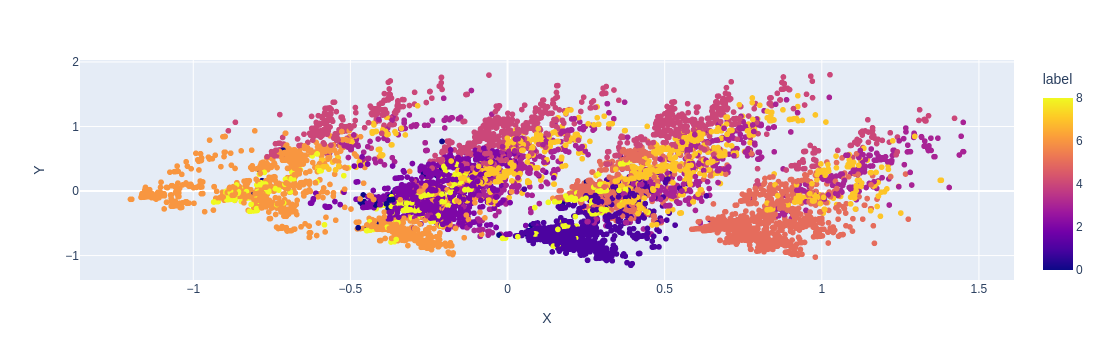

In [34]:
import plotly.express as px 
fig = px.scatter(df, x="X", y="Y",color="label", hover_data=["anime"]) 
fig.show() 

In [35]:
anime_clusters : Dict[str, [int, int]] = {} 
for _, row in df.iterrows():
    anime_clusters[row["anime"]] = [row["label"], row["anime_id"]] 


In [36]:
df  

X         Y  label  anime_id  \
0     -0.112969 -0.187065    2.0     32281   
1      0.923450  1.307869    7.0      5114   
2      1.126214  0.562634    3.0     28977   
3      0.347506  0.350963    5.0      9253   
4      1.126475  0.562552    3.0      9969   
...         ...       ...    ...       ...   
12059 -1.157407 -0.092709    6.0      9316   
12060 -1.156426 -0.092203    6.0      5543   
12061 -1.151877 -0.089862    6.0      5621   
12062 -1.151140 -0.089473    6.0      6133   
12063 -0.618895 -0.143541    2.0     26081   

                                                   anime  
0                                         Kimi no Na wa.  
1                       Fullmetal Alchemist: Brotherhood  
2                                               Gintama°  
3                                            Steins;Gate  
4                                          Gintama&#039;  
...                                                  ...  
12059       Toushindai My Lover: Minami tai Mecha-Minami  
12060                                        Under World  
12061                     Violence Gekiga David no Hoshi  
12062  Violence Gekiga Shin David no Hoshi: Inma Dens...  
12063                   Yasuji no Pornorama: Yacchimae!!  

[12064 rows x 5 columns]

In [37]:
max_user_id = len(ratings.user_id.unique()) 
max_anime_id = len(ratings.anime_id.unique()) 

user_to_idx = { int(user_id): int(idx) for idx, user_id in enumerate(ratings.user_id.unique()) } 
anime_to_idx = { int(anime_id) : int(idx) for idx, anime_id in enumerate(ratings.anime_id.unique()) } 

matrix = np.zeros((max_user_id, max_anime_id)).astype(np.int8) 

In [ ]:
from tqdm import tqdm 
for user_id in tqdm(ratings.user_id.unique()):
    profile = ratings.loc[ratings.user_id == user_id]
    for _, user_profile in profile.iterrows(): 
        matrix[ user_to_idx[user_id], anime_to_idx[ user_profile["anime_id"] ] ] = user_profile["rating"]  

 33%|████████████▎                        | 24392/73515 [06:27<12:36, 64.97it/s]

In [ ]:
from yellowbrick.cluster import KElbowVisualizer 

# won't run on my machine 
visualizer = KElbowVisualizer(k = (2, 14), estimator=KMeans()) 
visualizer.fit(scaled_m) 
visualizer.show() 